In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('linear_data.csv')
df1.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [3]:
x_linear = df1[['x']]
y_linear = df1[['y']]

In [4]:
df2 = pd.read_csv('nonlinear_data.csv')
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [5]:
x_nonlinear = df2[['x']]
y_nonlinear = df2[['y']]

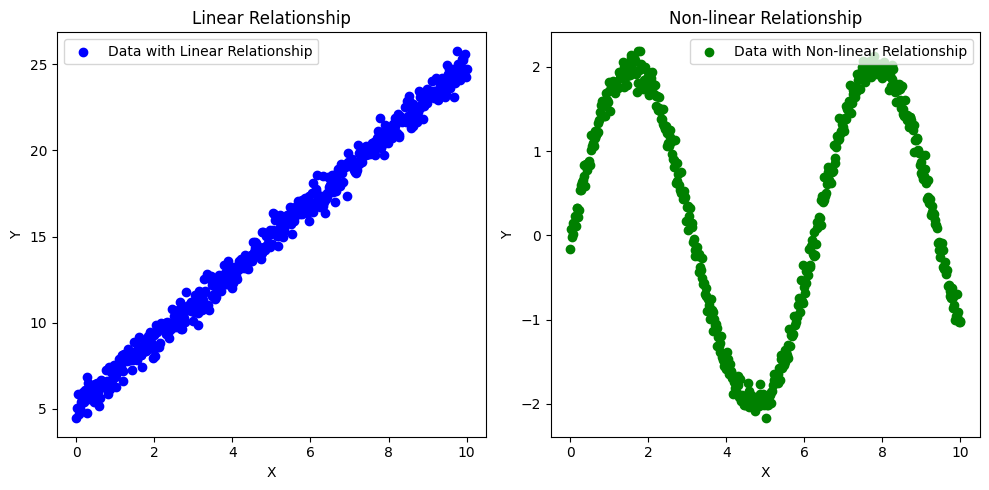

In [6]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
df1.corr() #linear

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [8]:

df2.corr() #non linear

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [9]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()
reg1.fit(x_linear, y_linear) # x= x_linear.reshape(-1, 1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
reg1.score(x_linear , y_linear)

0.9928923730526016

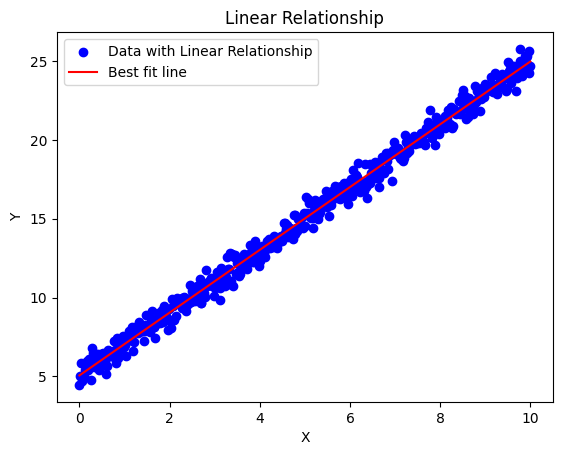

In [11]:
plt.scatter(x_linear, y_linear, color='blue', label='Data with Linear Relationship')
plt.plot(x_linear, reg1.predict(x_linear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

In [12]:
reg2 = LinearRegression()
reg2.fit(x_nonlinear , y_nonlinear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
reg2.score(x_nonlinear, y_nonlinear)

0.004321199719043656

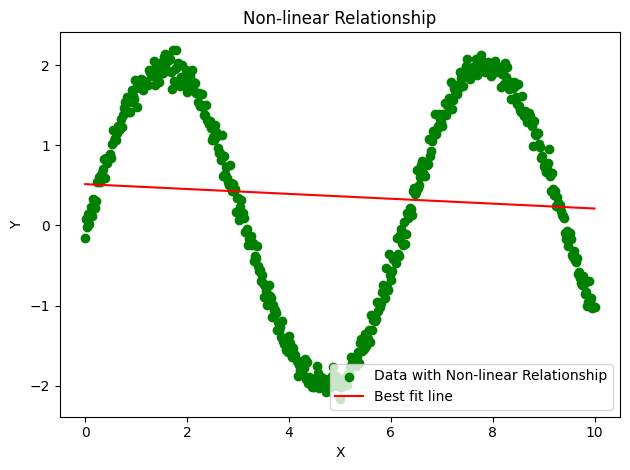

In [15]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, reg2.predict(x_nonlinear), color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.tight_layout()
plt.legend()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6) # polynomial regression with degree 2 
X_poly = poly.fit_transform(x_nonlinear)
X_poly.shape

(500, 7)

In [17]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly, y_nonlinear)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
reg_poly.score(X_poly, y_nonlinear)

0.9930624844497349

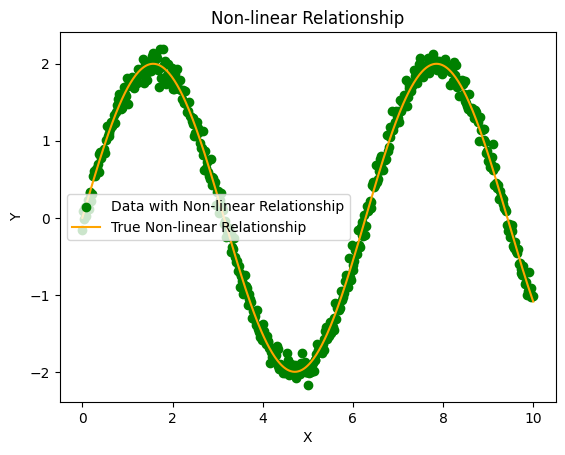

In [19]:
plt.scatter(x_nonlinear, y_nonlinear, color='green', label='Data with Non-linear Relationship')
plt.plot(x_nonlinear, 2 * np.sin(x_nonlinear), color='orange', label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_poly,y_nonlinear, test_size=.30, random_state=1 )

In [21]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
reg.score(xtest, ytest)

0.9905664282633516

In [23]:
reg.score(xtrain, ytrain) 

0.9939293669434802